Please download and load the data file by clicking <a href="https://github.com">here</a> before executing the following code.

## **Import packages**

In [ ]:
import tensorflow as tf
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import plot_tree
!pip install graphviz
import graphviz

## **Using CNN without amino acids (Mixed sampling)**

#### **Using all data except allowed/disallowed**

In [17]:
# Load the training data from a text file
data = np.loadtxt('/content/mixfinal.txt')
# Split the data into features (X) and labels (y)
X_tr = data[:, [9, 10, 11, 12, 13, 14]]

y_tr = data[:,0]

X_train1 = X_tr[100:]
X_test1 = X_tr[:100]
y_train = y_tr[100:]
y_test = y_tr[:100]

# Apply Z-score normalization to each column
X_train = zscore(X_train1, axis=0)
X_test = zscore(X_test1, axis=0)

ValueError: ignored

In [ ]:
# Create the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(6,)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    #tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    #tf.keras.layers.Dense(units=2, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
39/39 [==============================] - 2s 9ms/step - loss: 0.6104 - accuracy: 0.6881 - val_loss: 0.5559 - val_accuracy: 0.6900
Epoch 2/30
39/39 [==============================] - 0s 3ms/step - loss: 0.5610 - accuracy: 0.7242 - val_loss: 0.5529 - val_accuracy: 0.6800
Epoch 3/30
39/39 [==============================] - 0s 3ms/step - loss: 0.5539 - accuracy: 0.7218 - val_loss: 0.5576 - val_accuracy: 0.6900
Epoch 4/30
39/39 [==============================] - 0s 3ms/step - loss: 0.5460 - accuracy: 0.7314 - val_loss: 0.5627 - val_accuracy: 0.6800
Epoch 5/30
39/39 [==============================] - 0s 3ms/step - loss: 0.5388 - accuracy: 0.7310 - val_loss: 0.5631 - val_accuracy: 0.6600
Epoch 6/30
39/39 [==============================] - 0s 4ms/step - loss: 0.5323 - accuracy: 0.7363 - val_loss: 0.5627 - val_accuracy: 0.6800
Epoch 7/30
39/39 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.7346 - val_loss: 0.5606 - val_accuracy: 0.6900
Epoch 8/30
39/39 [==

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

y_pred_binary = np.array(y_pred_binary)


# Calculate the true positives, false positives, true negatives, and false negatives

true_positives = np.sum((y_pred_binary == 1) & (y_test == 1))
false_positives = np.sum((y_pred_binary == 1) & (y_test == 0))
true_negatives = np.sum((y_pred_binary == 0) & (y_test == 0))
false_negatives = np.sum((y_pred_binary == 0) & (y_test == 1))

# Create the table
table = [
    ["True Positives", true_positives],
    ["False Positives", false_positives],
    ["True Negatives", true_negatives],
    ["False Negatives", false_negatives]
]

# Calculate the maximum width of the first column
max_width = max(len(row[0]) for row in table)

# Print the table
print("Confusion Matrix:")
print("-----------------")
for row in table:
    print(f"{row[0]:<{max_width}} | {row[1]}")

print("-----------------")
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("-----------------")

4/4 [==============================] - 0s 3ms/step
Accuracy: 0.69
Confusion Matrix:
-----------------
True Positives  | 44
False Positives | 15
True Negatives  | 25
False Negatives | 16
-----------------
Accuracy: 0.6900
Precision: 0.7458
Recall: 0.7333
F1-Score: 0.7395
-----------------


In [ ]:
# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

#### **Using all data with allowed/disallowed**

In [ ]:
# Load the training data from a text file
data = np.loadtxt('/content/mixfinal.txt')
# Split the data into features (X) and labels (y)
X_tr = data[:, [1, 9, 10, 11, 12, 13, 14]]

y_tr = data[:,0]

X_train2 = X_tr[100:]
X_test2 = X_tr[:100]
y_train = y_tr[100:]
y_test = y_tr[:100]

# Apply Z-score normalization to each column
X_train = zscore(X_train2, axis=0)
X_test = zscore(X_test2, axis=0)

In [ ]:
# Create the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(7,)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    #tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    #tf.keras.layers.Dense(units=2, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
39/39 [==============================] - 3s 11ms/step - loss: 0.6182 - accuracy: 0.6736 - val_loss: 0.5471 - val_accuracy: 0.7200
Epoch 2/30
39/39 [==============================] - 0s 5ms/step - loss: 0.5559 - accuracy: 0.7210 - val_loss: 0.5482 - val_accuracy: 0.6900
Epoch 3/30
39/39 [==============================] - 0s 5ms/step - loss: 0.5438 - accuracy: 0.7354 - val_loss: 0.5407 - val_accuracy: 0.7200
Epoch 4/30
39/39 [==============================] - 0s 5ms/step - loss: 0.5354 - accuracy: 0.7443 - val_loss: 0.5361 - val_accuracy: 0.7000
Epoch 5/30
39/39 [==============================] - 0s 5ms/step - loss: 0.5277 - accuracy: 0.7487 - val_loss: 0.5356 - val_accuracy: 0.7100
Epoch 6/30
39/39 [==============================] - 0s 5ms/step - loss: 0.5213 - accuracy: 0.7567 - val_loss: 0.5324 - val_accuracy: 0.7100
Epoch 7/30
39/39 [==============================] - 0s 4ms/step - loss: 0.5161 - accuracy: 0.7551 - val_loss: 0.5292 - val_accuracy: 0.6800
Epoch 8/30
39/39 [=

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

y_pred_binary = np.array(y_pred_binary)

4/4 [==============================] - 0s 3ms/step
Accuracy: 0.81


In [ ]:
# Calculate the true positives, false positives, true negatives, and false negatives

true_positives = np.sum((y_pred_binary == 1) & (y_test == 1))
false_positives = np.sum((y_pred_binary == 1) & (y_test == 0))
true_negatives = np.sum((y_pred_binary == 0) & (y_test == 0))
false_negatives = np.sum((y_pred_binary == 0) & (y_test == 1))

# Create the table
table = [
    ["True Positives", true_positives],
    ["False Positives", false_positives],
    ["True Negatives", true_negatives],
    ["False Negatives", false_negatives]
]

# Calculate the maximum width of the first column
max_width = max(len(row[0]) for row in table)

# Print the table
print("Confusion Matrix:")
print("-----------------")
for row in table:
    print(f"{row[0]:<{max_width}} | {row[1]}")

print("-----------------")
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("-----------------")

Confusion Matrix:
-----------------
True Positives  | 46
False Positives | 5
True Negatives  | 35
False Negatives | 14
-----------------
Accuracy: 0.8100
Precision: 0.9020
Recall: 0.7667
F1-Score: 0.8288
-----------------


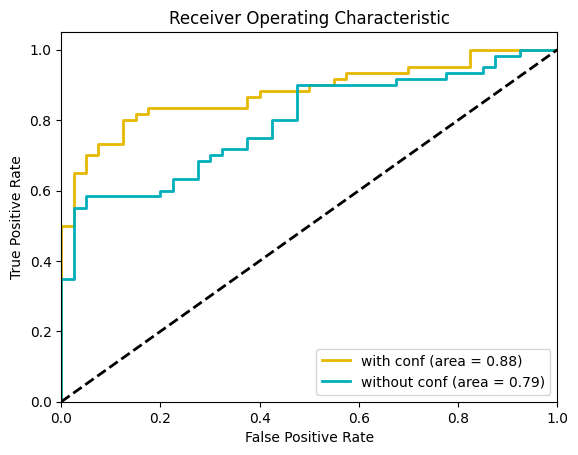

In [ ]:
# Mixed Sampling


# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc1 = auc(fpr1, tpr1)

# Plot the ROC curve
plt.figure()
plt.plot(fpr1, tpr1, color='#E7B800', lw=2, label='with conf (area = %0.2f)' % roc_auc1)
plt.plot(fpr, tpr, color='#00AFBB', lw=2, label='without conf (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('CNN_mixedsampling.png', dpi=300)
plt.show()

In [ ]:
# Calculate baseline accuracy
y_pred = model.predict(X_test)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]
baseline_accuracy = accuracy_score(y_test, y_pred_binary)

# Calculate feature importance using permutation importance
num_permutations = 100
feature_importance = np.zeros(X_test.shape[1])

for feature in range(X_test.shape[1]):
    X_test_permuted = X_test.copy()
    np.random.shuffle(X_test_permuted[:, feature])
    y_pred_permuted = model.predict(X_test_permuted)
    y_pred_binary_permuted = [1 if p >= 0.5 else 0 for p in y_pred_permuted]
    permuted_accuracy = accuracy_score(y_test, y_pred_binary_permuted)
    feature_importance[feature] = baseline_accuracy - permuted_accuracy

# Normalize feature importance
feature_importance /= np.sum(feature_importance)

# Print feature importance
for i, importance in enumerate(feature_importance):
    print(f'Feature {i+1} importance: {importance}')


4/4 [==============================] - 0s 3ms/step
Feature 1 importance: 0.08771929824561407
Feature 2 importance: 0.15789473684210534
Feature 3 importance: 0.2280701754385964
Feature 4 importance: 0.2456140350877192
Feature 5 importance: 0.1403508771929825
Feature 6 importance: 0.07017543859649125
Feature 7 importance: 0.07017543859649125


## **Using CNN with amino acids (Mixed sampling)**

#### **Using all data except allowed/disallowed**

In [ ]:
# Load the training data from a text file
data = np.loadtxt('/content/mixfinal.txt')
# Split the data into features (X) and labels (y)
X_tr = data[:, [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]

y_tr = data[:,0]

X_train1 = X_tr[100:]
X_test1 = X_tr[:100]
y_train = y_tr[100:]
y_test = y_tr[:100]

# Apply Z-score normalization to each column
X_train = zscore(X_train1, axis=0)
X_test = zscore(X_test1, axis=0)

In [ ]:
# Create the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(26,)),
    #tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    #tf.keras.layers.Dense(units=2, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
39/39 [==============================] - 1s 8ms/step - loss: 0.6576 - accuracy: 0.6146 - val_loss: 0.5892 - val_accuracy: 0.7100
Epoch 2/30
39/39 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.7081 - val_loss: 0.5178 - val_accuracy: 0.7300
Epoch 3/30
39/39 [==============================] - 0s 4ms/step - loss: 0.5382 - accuracy: 0.7363 - val_loss: 0.4949 - val_accuracy: 0.7700
Epoch 4/30
39/39 [==============================] - 0s 4ms/step - loss: 0.5084 - accuracy: 0.7648 - val_loss: 0.4797 - val_accuracy: 0.7500
Epoch 5/30
39/39 [==============================] - 0s 3ms/step - loss: 0.4870 - accuracy: 0.7812 - val_loss: 0.4778 - val_accuracy: 0.7800
Epoch 6/30
39/39 [==============================] - 0s 3ms/step - loss: 0.4656 - accuracy: 0.7916 - val_loss: 0.4812 - val_accuracy: 0.7700
Epoch 7/30
39/39 [==============================] - 0s 4ms/step - loss: 0.4440 - accuracy: 0.8017 - val_loss: 0.4578 - val_accuracy: 0.7400
Epoch 8/30
39/39 [==

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

y_pred_binary = np.array(y_pred_binary)


# Calculate the true positives, false positives, true negatives, and false negatives

true_positives = np.sum((y_pred_binary == 1) & (y_test == 1))
false_positives = np.sum((y_pred_binary == 1) & (y_test == 0))
true_negatives = np.sum((y_pred_binary == 0) & (y_test == 0))
false_negatives = np.sum((y_pred_binary == 0) & (y_test == 1))

# Create the table
table = [
    ["True Positives", true_positives],
    ["False Positives", false_positives],
    ["True Negatives", true_negatives],
    ["False Negatives", false_negatives]
]

# Calculate the maximum width of the first column
max_width = max(len(row[0]) for row in table)

# Print the table
print("Confusion Matrix:")
print("-----------------")
for row in table:
    print(f"{row[0]:<{max_width}} | {row[1]}")

print("-----------------")
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("-----------------")

4/4 [==============================] - 0s 3ms/step
Accuracy: 0.89
Confusion Matrix:
-----------------
True Positives  | 52
False Positives | 3
True Negatives  | 37
False Negatives | 8
-----------------
Accuracy: 0.8900
Precision: 0.9455
Recall: 0.8667
F1-Score: 0.9043
-----------------


In [ ]:
# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

#### **Using all data with allowed/disallowed**

In [ ]:
# Load the training data from a text file
data = np.loadtxt('/content/mixfinal.txt')
# Split the data into features (X) and labels (y)
X_tr = data[:, [1, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]

y_tr = data[:,0]

X_train2 = X_tr[100:]
X_test2 = X_tr[:100]
y_train = y_tr[100:]
y_test = y_tr[:100]

# Apply Z-score normalization to each column
X_train = zscore(X_train2, axis=0)
X_test = zscore(X_test2, axis=0)

In [ ]:
# Create the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27,)),
    #tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    #tf.keras.layers.Dense(units=2, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
39/39 [==============================] - 1s 7ms/step - loss: 0.6682 - accuracy: 0.6138 - val_loss: 0.6199 - val_accuracy: 0.6800
Epoch 2/30
39/39 [==============================] - 0s 3ms/step - loss: 0.6024 - accuracy: 0.6981 - val_loss: 0.5402 - val_accuracy: 0.7300
Epoch 3/30
39/39 [==============================] - 0s 3ms/step - loss: 0.5589 - accuracy: 0.7218 - val_loss: 0.5022 - val_accuracy: 0.7600
Epoch 4/30
39/39 [==============================] - 0s 4ms/step - loss: 0.5316 - accuracy: 0.7471 - val_loss: 0.4802 - val_accuracy: 0.7700
Epoch 5/30
39/39 [==============================] - 0s 4ms/step - loss: 0.5060 - accuracy: 0.7635 - val_loss: 0.4656 - val_accuracy: 0.7700
Epoch 6/30
39/39 [==============================] - 0s 4ms/step - loss: 0.4813 - accuracy: 0.7688 - val_loss: 0.4450 - val_accuracy: 0.7600
Epoch 7/30
39/39 [==============================] - 0s 3ms/step - loss: 0.4581 - accuracy: 0.7884 - val_loss: 0.4340 - val_accuracy: 0.7800
Epoch 8/30
39/39 [==

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

y_pred_binary = np.array(y_pred_binary)

4/4 [==============================] - 0s 3ms/step
Accuracy: 0.93


In [ ]:
# Calculate the true positives, false positives, true negatives, and false negatives

true_positives = np.sum((y_pred_binary == 1) & (y_test == 1))
false_positives = np.sum((y_pred_binary == 1) & (y_test == 0))
true_negatives = np.sum((y_pred_binary == 0) & (y_test == 0))
false_negatives = np.sum((y_pred_binary == 0) & (y_test == 1))

# Create the table
table = [
    ["True Positives", true_positives],
    ["False Positives", false_positives],
    ["True Negatives", true_negatives],
    ["False Negatives", false_negatives]
]

# Calculate the maximum width of the first column
max_width = max(len(row[0]) for row in table)

# Print the table
print("Confusion Matrix:")
print("-----------------")
for row in table:
    print(f"{row[0]:<{max_width}} | {row[1]}")

print("-----------------")
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("-----------------")

Confusion Matrix:
-----------------
True Positives  | 53
False Positives | 0
True Negatives  | 40
False Negatives | 7
-----------------
Accuracy: 0.9300
Precision: 1.0000
Recall: 0.8833
F1-Score: 0.9381
-----------------


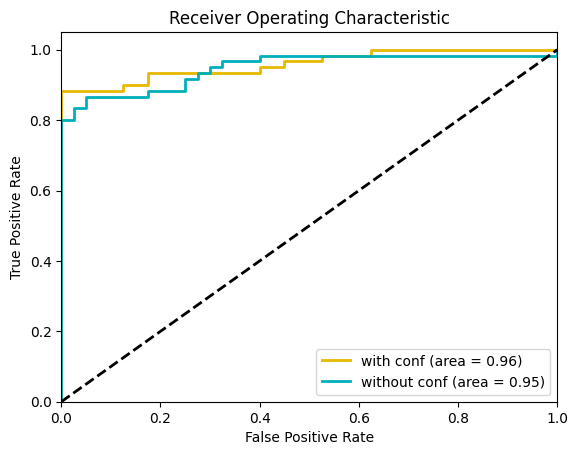

In [ ]:
# Mixed Sampling


# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc1 = auc(fpr1, tpr1)

# Plot the ROC curve
plt.figure()
plt.plot(fpr1, tpr1, color='#E7B800', lw=2, label='with conf (area = %0.2f)' % roc_auc1)
plt.plot(fpr, tpr, color='#00AFBB', lw=2, label='without conf (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('CNN_mixedsampling.png', dpi=300)
plt.show()

In [ ]:
# Calculate baseline accuracy
y_pred = model.predict(X_test)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]
baseline_accuracy = accuracy_score(y_test, y_pred_binary)

# Calculate feature importance using permutation importance
num_permutations = 100
feature_importance = np.zeros(X_test.shape[1])

for feature in range(X_test.shape[1]):
    X_test_permuted = X_test.copy()
    np.random.shuffle(X_test_permuted[:, feature])
    y_pred_permuted = model.predict(X_test_permuted)
    y_pred_binary_permuted = [1 if p >= 0.5 else 0 for p in y_pred_permuted]
    permuted_accuracy = accuracy_score(y_test, y_pred_binary_permuted)
    feature_importance[feature] = baseline_accuracy - permuted_accuracy

# Normalize feature importance
feature_importance /= np.sum(feature_importance)

# Print feature importance
for i, importance in enumerate(feature_importance):
    print(f'Feature {i+1} importance: {importance}')


4/4 [==============================] - 0s 3ms/step
Feature 1 importance: 0.08771929824561407
Feature 2 importance: 0.15789473684210534
Feature 3 importance: 0.2280701754385964
Feature 4 importance: 0.2456140350877192
Feature 5 importance: 0.1403508771929825
Feature 6 importance: 0.07017543859649125
Feature 7 importance: 0.07017543859649125


## **XgBoost Without amino acids (Mixed sampling)**

Confusion Matrix:
-----------------
True Positives  | 48
False Positives | 16
True Negatives  | 24
False Negatives | 12
-----------------
Accuracy: 0.7200
Precision: 0.7500
Recall: 0.8000
F1-Score: 0.7742
-----------------
Confusion Matrix:
-----------------
True Positives  | 52
False Positives | 15
True Negatives  | 25
False Negatives | 8
-----------------
Accuracy: 0.7700
Precision: 0.7761
Recall: 0.8667
F1-Score: 0.8189
-----------------


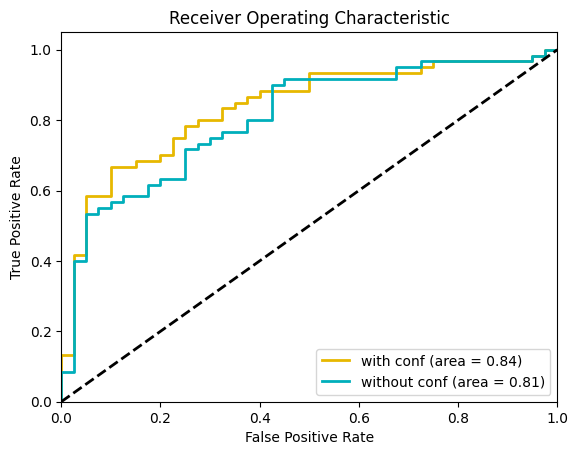

In [ ]:
import xgboost as xgb

# Load the training data from a text file
data = np.loadtxt('/content/mixfinal.txt')

# Split the data into features (X) and labels (y)
X_tr = data[:, [7, 9, 10, 11, 12, 13, 14]
]
y_tr = data[:,0]

X_train1 = X_tr[100:]
X_test1 = X_tr[:100]
y_train = y_tr[100:]
y_test = y_tr[:100]

# Apply Z-score normalization to each column
X_train = zscore(X_train1, axis=0)
X_test = zscore(X_test1, axis=0)

# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


# Set the XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 5,
    'reg_alpha': 0.007,
    'reg_lambda': 0.1,
    'gamma': 0.5
}


# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Obtain predicted probabilities for the positive class
y_pred_proba = xgb_model.predict(dtest)

letpara = ['allow_dis', 'asa_surface', 'foldX_ddG', 'normScore', 'address_contact', 'hbond', 'modeller_short_contact']

# Get the graphviz representation of the first tree
xgb_tree = xgb.to_graphviz(xgb_model, num_trees=0)

# Get the DOT source code from the graphviz tree
dot_source = xgb_tree.source

# Modify the node labels in the DOT source code
for feature_index, feature_name in enumerate(letpara):
    dot_source = dot_source.replace(f'f{feature_index}', feature_name)

# Create a new graphviz.Source object with the modified DOT source code
modified_tree = graphviz.Source(dot_source)
#print(modified_tree)
# Render and display the modified tree
modified_tree.format = 'png'
modified_tree.render('xgboost_tree_mixedsampling_0', view=True)

'''
# plot single tree
plot_tree(xgb_model)
plt.savefig('xgboost_mixedsamplingtree1.png', dpi=300)
plt.show()
'''

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

#############



y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_proba]

y_pred_binary = np.array(y_pred_binary)

# Calculate the true positives, false positives, true negatives, and false negatives

true_positives = np.sum((y_pred_binary == 1) & (y_test == 1))
false_positives = np.sum((y_pred_binary == 1) & (y_test == 0))
true_negatives = np.sum((y_pred_binary == 0) & (y_test == 0))
false_negatives = np.sum((y_pred_binary == 0) & (y_test == 1))

# Create the table
table = [
    ["True Positives", true_positives],
    ["False Positives", false_positives],
    ["True Negatives", true_negatives],
    ["False Negatives", false_negatives]
]

# Calculate the maximum width of the first column
max_width = max(len(row[0]) for row in table)

# Print the table
print("Confusion Matrix:")
print("-----------------")
for row in table:
    print(f"{row[0]:<{max_width}} | {row[1]}")

print("-----------------")
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("-----------------")





################

##############################################



# Load the training data from a text file
data = np.loadtxt('/content/mixfinal.txt')

# Split the data into features (X) and labels (y)
#X_tr = data[:, [4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
X_tr = data[:, [1, 9, 10, 11, 12, 13, 14]
]
y_tr = data[:,0]

X_train1 = X_tr[100:]
X_test1 = X_tr[:100]
y_train = y_tr[100:]
y_test = y_tr[:100]


# Apply Z-score normalization to each column
X_train = zscore(X_train1, axis=0)
X_test = zscore(X_test1, axis=0)


# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


# Set the XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 5,
    'reg_alpha': 0.007,
    'reg_lambda': 0.1,
    'gamma': 0.5
}


# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

letpara1 = ['allow_dis', 'asa_surface', 'foldX_ddG', 'normScore', 'address_contact', 'hbond', 'modeller_short_contact']

# Get the graphviz representation of the first tree
xgb_tree = xgb.to_graphviz(xgb_model, num_trees=1)

# Get the DOT source code from the graphviz tree
dot_source = xgb_tree.source

# Modify the node labels in the DOT source code
for feature_index, feature_name in enumerate(letpara1):
    dot_source = dot_source.replace(f'f{feature_index}', feature_name)

# Create a new graphviz.Source object with the modified DOT source code
modified_tree = graphviz.Source(dot_source)

# Render and display the modified tree
modified_tree.format = 'png'
modified_tree.render('xgboost_tree_mixedsampling_1', view=True)
#print(modified_tree)

'''
# plot single tree
plot_tree(xgb_model)
plt.savefig('xgboost_mixedsamplingtree2.png', dpi=300)
plt.show()
'''
# Obtain predicted probabilities for the positive class
y_pred_proba = xgb_model.predict(dtest)
#############



y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_proba]

y_pred_binary = np.array(y_pred_binary)

# Calculate the true positives, false positives, true negatives, and false negatives

true_positives = np.sum((y_pred_binary == 1) & (y_test == 1))
false_positives = np.sum((y_pred_binary == 1) & (y_test == 0))
true_negatives = np.sum((y_pred_binary == 0) & (y_test == 0))
false_negatives = np.sum((y_pred_binary == 0) & (y_test == 1))

# Create the table
table = [
    ["True Positives", true_positives],
    ["False Positives", false_positives],
    ["True Negatives", true_negatives],
    ["False Negatives", false_negatives]
]

# Calculate the maximum width of the first column
max_width = max(len(row[0]) for row in table)

# Print the table
print("Confusion Matrix:")
print("-----------------")
for row in table:
    print(f"{row[0]:<{max_width}} | {row[1]}")

print("-----------------")
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("-----------------")


#####################################


# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC curve
plt.figure()
plt.plot(fpr3, tpr3, color='#E7B800', lw=2, label='with conf (area = %0.2f)' % roc_auc3)
plt.plot(fpr, tpr, color='#00AFBB', lw=2, label='without conf (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('xgboost_mixedsampling.png', dpi=1000)
plt.show()

## **XgBoost With amino acids (Mixed sampling)**

Confusion Matrix:
-----------------
True Positives  | 54
False Positives | 10
True Negatives  | 30
False Negatives | 6
-----------------
Accuracy: 0.8400
Precision: 0.8438
Recall: 0.9000
F1-Score: 0.8710
-----------------
Confusion Matrix:
-----------------
True Positives  | 55
False Positives | 7
True Negatives  | 33
False Negatives | 5
-----------------
Accuracy: 0.8800
Precision: 0.8871
Recall: 0.9167
F1-Score: 0.9016
-----------------


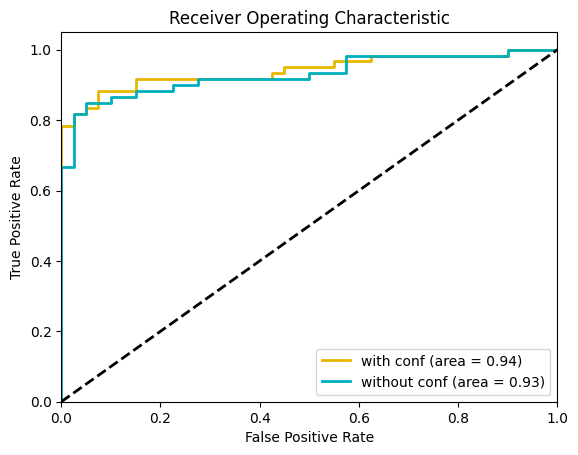

In [ ]:
import xgboost as xgb

# Load the training data from a text file
data = np.loadtxt('/content/mixfinal.txt')

# Split the data into features (X) and labels (y)
X_tr = data[:, [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]
#X_tr = data[:, [9, 10, 11, 12, 13, 14]]

y_tr = data[:,0]

X_train1 = X_tr[100:]
X_test1 = X_tr[:100]
y_train = y_tr[100:]
y_test = y_tr[:100]

# Apply Z-score normalization to each column
X_train = zscore(X_train1, axis=0)
X_test = zscore(X_test1, axis=0)

# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 8,
    'reg_alpha': 0.001,
    'reg_lambda': 0.1,
    'gamma': 0.6

}



# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Obtain predicted probabilities for the positive class
y_pred_proba = xgb_model.predict(dtest)

letpara = ['asa_surface', 'foldX_ddG', 'normScore', 'address_contact', 'hbond', 'modeller_short_contact', 'A',	'C', 'D', 'E', 'F', 'G', 'H',	'I', 'K',	'L', 'M',	'N', 'P',	'Q', 'R', 'S', 'T',	'V', 'W', 'Y']

# Get the graphviz representation of the first tree
xgb_tree = xgb.to_graphviz(xgb_model, num_trees=0)

# Get the DOT source code from the graphviz tree
dot_source = xgb_tree.source

# Modify the node labels in the DOT source code
for feature_index, feature_name in enumerate(letpara):
    dot_source = dot_source.replace(f'f{feature_index}', feature_name)

# Create a new graphviz.Source object with the modified DOT source code
modified_tree = graphviz.Source(dot_source)
#print(modified_tree)
# Render and display the modified tree
modified_tree.format = 'png'
modified_tree.render('xgboost_tree_mixedsampling_0', view=True)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

#############



y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_proba]

y_pred_binary = np.array(y_pred_binary)

# Calculate the true positives, false positives, true negatives, and false negatives

true_positives = np.sum((y_pred_binary == 1) & (y_test == 1))
false_positives = np.sum((y_pred_binary == 1) & (y_test == 0))
true_negatives = np.sum((y_pred_binary == 0) & (y_test == 0))
false_negatives = np.sum((y_pred_binary == 0) & (y_test == 1))

# Create the table
table = [
    ["True Positives", true_positives],
    ["False Positives", false_positives],
    ["True Negatives", true_negatives],
    ["False Negatives", false_negatives]
]

# Calculate the maximum width of the first column
max_width = max(len(row[0]) for row in table)

# Print the table
print("Confusion Matrix:")
print("-----------------")
for row in table:
    print(f"{row[0]:<{max_width}} | {row[1]}")

print("-----------------")
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("-----------------")





################

##############################################



# Load the training data from a text file
data = np.loadtxt('/content/mixfinal.txt')

# Split the data into features (X) and labels (y)
X_tr = data[:, [1, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]
#X_tr = data[:, [1, 9, 10, 11, 12, 13, 14]]

y_tr = data[:,0]

X_train1 = X_tr[100:]
X_test1 = X_tr[:100]
y_train = y_tr[100:]
y_test = y_tr[:100]


# Apply Z-score normalization to each column
X_train = zscore(X_train1, axis=0)
X_test = zscore(X_test1, axis=0)


# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 8,
    'reg_alpha': 0.001,
    'reg_lambda': 0.1,
    'gamma': 0.6

}

# Train the XGBoost model , 'A',	'C', 'D', 'E', 'F', 'G', 'H',	'I', 'K',	'L', 'M',	'N', 'P',	'Q', 'R', 'S', 'T',	'V', 'W', 'Y'
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

letpara1 = ['allowed_disa', 'asa_surface', 'foldX_ddG', 'normScore', 'address_contact', 'hbond', 'modeller_short_contact', 'A',	'C', 'D', 'E', 'F', 'G', 'H',	'I', 'K',	'L', 'M',	'N', 'P',	'Q', 'R', 'S', 'T',	'V', 'W', 'Y']

# Get the graphviz representation of the first tree
xgb_tree = xgb.to_graphviz(xgb_model, num_trees=1)

# Get the DOT source code from the graphviz tree
dot_source = xgb_tree.source

# Modify the node labels in the DOT source code
for feature_index, feature_name in enumerate(letpara1):
    dot_source = dot_source.replace(f'f{feature_index}', feature_name)

# Create a new graphviz.Source object with the modified DOT source code
modified_tree = graphviz.Source(dot_source)

# Render and display the modified tree
modified_tree.format = 'png'
modified_tree.render('xgboost_tree_mixedsampling_1', view=True)
#print(modified_tree)

# Obtain predicted probabilities for the positive class
y_pred_proba = xgb_model.predict(dtest)
#############



y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_proba]

y_pred_binary = np.array(y_pred_binary)

# Calculate the true positives, false positives, true negatives, and false negatives

true_positives = np.sum((y_pred_binary == 1) & (y_test == 1))
false_positives = np.sum((y_pred_binary == 1) & (y_test == 0))
true_negatives = np.sum((y_pred_binary == 0) & (y_test == 0))
false_negatives = np.sum((y_pred_binary == 0) & (y_test == 1))

# Create the table
table = [
    ["True Positives", true_positives],
    ["False Positives", false_positives],
    ["True Negatives", true_negatives],
    ["False Negatives", false_negatives]
]

# Calculate the maximum width of the first column
max_width = max(len(row[0]) for row in table)

# Print the table
print("Confusion Matrix:")
print("-----------------")
for row in table:
    print(f"{row[0]:<{max_width}} | {row[1]}")

print("-----------------")
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("-----------------")


#####################################


# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC curve
plt.figure()
plt.plot(fpr3, tpr3, color='#E7B800', lw=2, label='with conf (area = %0.2f)' % roc_auc3)
plt.plot(fpr, tpr, color='#00AFBB', lw=2, label='without conf (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('xgboost_mixedsampling_AA.png', dpi=1000)
plt.show()

## **Code to find optimum parameters for XgBoost (Optional)**

In [ ]:
# Load the training data from a text file
data = np.loadtxt('/content/mixfinal.txt')

# Split the data into features (X) and labels (y)
X_tr = data[:, [1, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]
#X_tr = data[:, [1, 9, 10, 11, 12, 13, 14]]

y_tr = data[:,0]

X_train1 = X_tr[100:]
X_test1 = X_tr[:100]
y_train = y_tr[100:]
y_test = y_tr[:100]


# Apply Z-score normalization to each column
X_train = zscore(X_train1, axis=0)
X_test = zscore(X_test1, axis=0)

In [ ]:
# Define the parameter distributions for randomized search
param_dist = {
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
    'learning_rate': [0.1],
    'max_depth': [5,7,6,8],
    'reg_alpha': [0.007, 0.1, 1.0, 10.0, 0.01, 0.001],
    'reg_lambda': [0.01, 0.1, 1.0, 10.0],
    'gamma': [0, 0.1, 0.5, 1.0, 0.01, 0.6]
}


# Create an XGBoost classifier
xgb_model1 = xgb.XGBClassifier()

# Perform randomized search with cross-validation
random_search1 = RandomizedSearchCV(xgb_model1, param_dist, n_iter=10, scoring='accuracy', cv=5)
random_search1.fit(X_train, y_train)

# Get the best parameter values and the corresponding model
best_params = random_search1.best_params_
best_model = random_search1.best_estimator_

# Print the best parameter values
print("Best Parameter Values:")
for param, value in best_params.items():
    print(f"{param}: {value}")


# Evaluate the best model on the validation set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy}")

# Train the final model on the entire dataset using the best parameters
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

Best Parameter Values:
reg_lambda: 0.1
reg_alpha: 0.001
objective: binary:logistic
max_depth: 8
learning_rate: 0.1
gamma: 0.6
eval_metric: logloss
Best Model Accuracy: 0.88


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.6, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

## **Getting feature importance (Optional)**

In [ ]:
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_proba]

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8


In [ ]:
# Get feature importance
importance = xgb_model.get_score(importance_type='gain')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Print feature importance
print("Feature Importance:")
for feature, importance_score in sorted_importance:
    print(f'Feature {feature}: {importance_score}')

Feature Importance:
Feature f4: 12.189614295959473
Feature f3: 6.557542324066162
Feature f14: 5.679976463317871
Feature f18: 5.673801898956299
Feature f7: 5.425024509429932
Feature f17: 5.264420032501221
Feature f24: 5.233043193817139
Feature f2: 5.0687079429626465
Feature f13: 5.065770626068115
Feature f23: 4.912106513977051
Feature f6: 4.769985675811768
Feature f20: 4.678173542022705
Feature f26: 4.465542793273926
Feature f22: 4.460500240325928
Feature f10: 4.3463568687438965
Feature f8: 4.29525089263916
Feature f9: 4.184313774108887
Feature f19: 4.102970600128174
Feature f25: 4.061570167541504
Feature f15: 3.997736692428589
Feature f16: 3.970878839492798
Feature f12: 3.9634177684783936
Feature f1: 3.901219129562378
Feature f0: 3.7688143253326416
Feature f11: 3.76485013961792
Feature f27: 3.6287167072296143
Feature f5: 3.5069427490234375
Feature f21: 3.506319761276245
